### Download Data

In [1]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import random
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip  -O cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

--2023-01-08 17:54:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   208MB/s    in 0.3s    

2023-01-08 17:54:59 (208 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



This data only has train and validation folders, so we need a test folder. I will check how many files the folders have and then I will decide how to create the test folder.

In [3]:
original_dir = "cats_and_dogs_filtered"
train_dir = os.path.join(original_dir, "train")
val_dir = os.path.join(original_dir, "validation")

train_files = len(os.listdir(os.path.join(train_dir, "cats"))) + len(os.listdir(os.path.join(train_dir, "dogs")))
val_files = len(os.listdir(os.path.join(val_dir, "cats"))) + len(os.listdir(os.path.join(val_dir, "dogs")))

print(f"There are {train_files} train files")
print(f"There are {val_files} validation files")

There are 2000 train files
There are 1000 validation files


I will move 100 validation cats files to test and 100 validation dogs files to test

In [4]:
destination_dir = os.path.join(original_dir, "test")

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

In [5]:
os.makedirs(os.path.join(destination_dir, "cats"))
os.makedirs(os.path.join(destination_dir, "dogs"))

In [6]:
def move_files(num_files, source_dir, destination_dir):
    files = os.listdir(os.path.join(source_dir))

    for file in files[:num_files]:
        src = os.path.join(source_dir, file)
        dst = os.path.join(destination_dir, file)
        os.rename(src, dst)

In [7]:
move_files(100, os.path.join(val_dir, "cats"), os.path.join(destination_dir, "cats"))

In [8]:
move_files(100, os.path.join(val_dir, "dogs"), os.path.join(destination_dir, "dogs"))

In [9]:
def displayRandomPictures(split, picture_class, k=7):
    filenames = os.listdir(os.path.join('cats_and_dogs_filtered', split, picture_class))
    random_filenames = random.choices(filenames, k=k)
    fig, ax = plt.subplots(1, k, figsize=(k * 3, 3))
    for i in range(k):
      im = mpimg.imread(os.path.join('cats_and_dogs_filtered', split, picture_class, random_filenames[i]))
      ax[i].imshow(im)

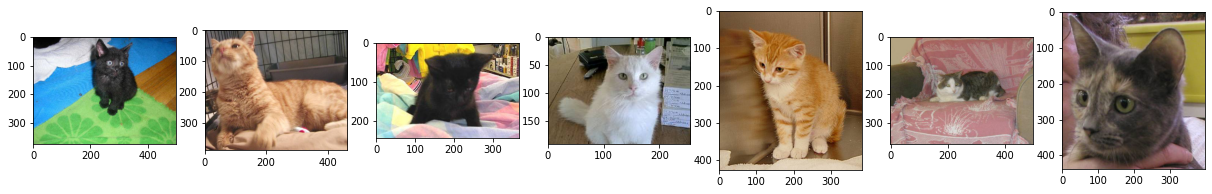

In [10]:
displayRandomPictures('train', 'cats')

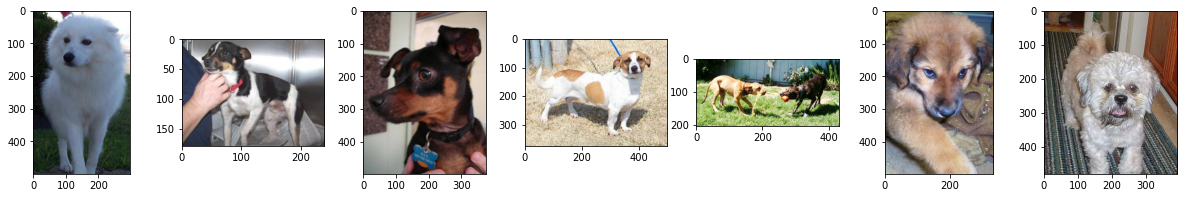

In [11]:
displayRandomPictures('train', 'dogs')

In [12]:
train_cats_files = os.listdir("cats_and_dogs_filtered/train/cats")
train_dogs_files = os.listdir("cats_and_dogs_filtered/train/dogs")
validation_cats_files = os.listdir("cats_and_dogs_filtered/validation/cats")
validation_dogs_files = os.listdir("cats_and_dogs_filtered/validation/dogs")
test_cats_files = os.listdir("cats_and_dogs_filtered/test/cats")
test_dogs_files = os.listdir("cats_and_dogs_filtered/test/dogs")

print(f"There are {len(train_cats_files)} images of cats in the training data set")
print(f"There are {len(train_dogs_files)} images of dogs in the training data set")
print(f"There are {len(validation_cats_files)} images of cats in the validation data set")
print(f"There are {len(validation_dogs_files)} images of dogs in the validation data set")
print(f"There are {len(test_cats_files)} images of cats in the test data set")
print(f"There are {len(test_dogs_files)} images of dogs in the test data set")

There are 1000 images of cats in the training data set
There are 1000 images of dogs in the training data set
There are 400 images of cats in the validation data set
There are 400 images of dogs in the validation data set
There are 100 images of cats in the test data set
There are 100 images of dogs in the test data set


## Creating Datasets using Image Data Generator 

In [13]:
def create_dataset(split, batch_size):
    image_directory = os.path.join('cats_and_dogs_filtered', split)

    imageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    image_generator = imageDataGenerator.flow_from_directory(
        image_directory,
        target_size=(256, 256),
        color_mode='rgb',
        classes=None,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True    
        )
    
    return image_generator

In [14]:
BATCH_SIZE = 32

In [15]:
train_ds = create_dataset("train", BATCH_SIZE)
val_ds = create_dataset("validation", BATCH_SIZE)
test_ds = create_dataset("test", BATCH_SIZE)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [16]:
print(f"The train image generator has {len(train_ds)} batches, each with a batch size of 32")
print(f"The validation image generator has {len(val_ds)} batches, each with a batch size of 32")
print(f"The test image generator has {len(test_ds)} batches, each with a batch size of 32")

The train image generator has 63 batches, each with a batch size of 32
The validation image generator has 25 batches, each with a batch size of 32
The test image generator has 7 batches, each with a batch size of 32


In [17]:
batch = train_ds.next()

In [18]:
len(batch)

2

In [19]:
batch[1]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

These are the labels. Therefore 'batch[0]' must contain the images.

I don't know what these labels mean but I can find out.

In [20]:
def displayRandomPicturesFromGenerator(batch_item, k=7):
    batch_size = len(batch_item[0])
    images = batch_item[0]
    labels = batch_item[1]
    random_indices = random.sample(range(0, batch_size), k)
    fig, ax = plt.subplots(1, k, figsize=(k * 3, 3))
    for i in range(k):
      ax[i].imshow(images[random_indices[i]])
      ax[i].set_title(str(labels[random_indices[i]]))

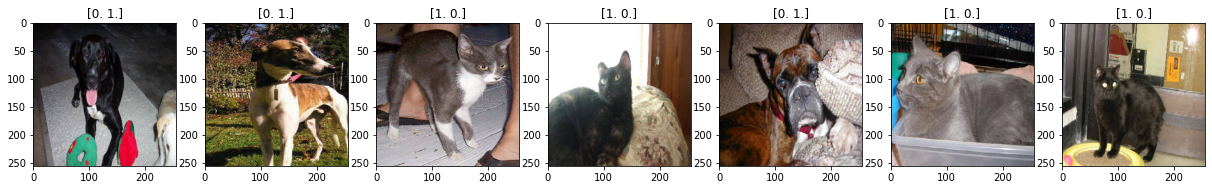

In [21]:
displayRandomPicturesFromGenerator(batch)

From this we can tell that "0. 1" means dog and "1. 0" means cat.

## Model

In [22]:
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.9.2
Hub version: 0.12.0
GPU is available


#### Creating Model Structure

In [23]:
model_handle = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [24]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (256, 256) + (3,)),
    hub.KerasLayer(model_handle, trainable = False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

Building model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2


In [25]:
model.build((None,)+(256, 256)+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 207,618,394
Trainable params: 2,562
Non-trainable params: 207,615,832
_________________________________________________________________


In [26]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

#### Initial Training

In [27]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=5,
    mode='min',
    restore_best_weights=True)

steps_per_epoch = (len(train_cats_files) + len(train_dogs_files))//BATCH_SIZE
validation_steps = (len(validation_cats_files) + len(validation_dogs_files))//BATCH_SIZE


hist = model.fit(
    train_ds,
    epochs=200, 
    steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps,
    callbacks = [reduce_lr, early_stopping],
    verbose = 1).history

Epoch 1/200
62/62 [==============================] - 103s 1s/step - loss: 0.5211 - accuracy: 0.9502 - val_loss: 0.2485 - val_accuracy: 0.9950 - lr: 0.0050
Epoch 2/200
62/62 [==============================] - 59s 949ms/step - loss: 0.2754 - accuracy: 0.9822 - val_loss: 0.2902 - val_accuracy: 0.9900 - lr: 0.0050
Epoch 3/200
62/62 [==============================] - 60s 968ms/step - loss: 0.2529 - accuracy: 0.9949 - val_loss: 0.2357 - val_accuracy: 0.9950 - lr: 0.0050
Epoch 4/200
62/62 [==============================] - 59s 962ms/step - loss: 0.2333 - accuracy: 0.9975 - val_loss: 0.2195 - val_accuracy: 1.0000 - lr: 0.0050
Epoch 5/200
62/62 [==============================] - 60s 965ms/step - loss: 0.2294 - accuracy: 0.9980 - val_loss: 0.2164 - val_accuracy: 0.9975 - lr: 0.0050
Epoch 6/200
62/62 [==============================] - 60s 967ms/step - loss: 0.2250 - accuracy: 0.9980 - val_loss: 0.2161 - val_accuracy: 0.9962 - lr: 0.0050
Epoch 7/200
62/62 [==============================] - 59s 949

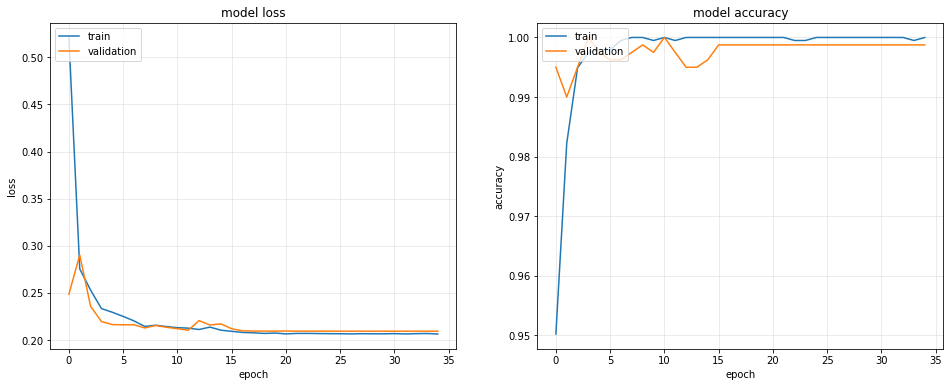

In [28]:
# Plot Loss & Accuracy
def plotMetrics(history, metrices):
    metric_count = len(metrices)
    fig, ax = plt.subplots(1, metric_count, figsize=(metric_count * 8, 6))
    for i, metric in enumerate(metrices):
      ax[i].plot(history[metric])
      ax[i].plot(history['val_' + metric])
      ax[i].legend(['train', 'validation'], loc='upper left')
      ax[i].grid(alpha=0.3)
      ax[i].set_title('model ' + metric)
      ax[i].set_ylabel(metric)
      ax[i].set_xlabel('epoch')      

plotMetrics(hist, ['loss', 'accuracy'])  

## Accuracy on Test Data

(256, 256, 3)


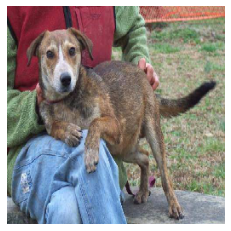

1/1 [==============================] - 0s 81ms/step
True label: dog
Predicted label: dog


In [54]:
x, y = next(iter(test_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

class_names = ['cat', 'dog']
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

In [ ]:
predictions = []

for i in range(200):
    x, y = next(iter(test_ds))
    image = x[0, :, :, :]
    true_index = np.argmax(y[0])
    prediction_scores = model.predict(np.expand_dims(image, axis=0))
    predicted_index = np.argmax(prediction_scores)
    predictions.append(predicted_index == true_index)

In [60]:
accuracy = len(list(filter(lambda x: x == True, predictions)))/len(predictions)
print(f"The model created above has a test accuracy of {accuracy*100}%")

The model created above has a test accuracy of 99.0%


### Save Model

In [94]:
model_save_path = 'Cats_and_Dogs_Model_EfficientNet.h5' 
model.save(model_save_path)

In [95]:
os.listdir()

['.config',
 'Cats_and_Dogs_Model_EfficientNet.h5',
 'cats_and_dogs_filtered',
 'cats_and_dogs_filtered.zip',
 'sample_data']

This shows that the model has been saved

### Load Model

In [100]:
new_model = tf.keras.models.load_model('Cats_and_Dogs_Model_EfficientNet.h5', custom_objects={'KerasLayer': hub.KerasLayer})

#### Using loaded model to test

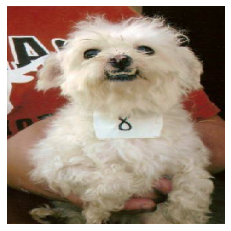

1/1 [==============================] - 5s 5s/step
True label: dog
Predicted label: dog


In [101]:
x, y = next(iter(test_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

class_names = ['cat', 'dog']
prediction_scores = new_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

### Save Model to Google Drive

#### Mount Google Drive

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
!cp Cats_and_Dogs_Model_EfficientNet.h5 '/content/drive/My Drive/Neural Networks/Computer Vision/'